# Calculating Invariant Mass - WORKED EXAMPLE 

This activity uses data from the [CMS detector](https://cms.cern/detector) at CERN in Geneva, Switzerland. We've used this in [Quarknet's Data Camp at Fermilab](https://quarknet.org/page/data-camp-description) for several years to help teachers learn about particle physics.  

To get started,
- You won't hurt anything by experimenting. If you break it, close the tab and open the activity again to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Coding activity](./intro.ipynb) and come back here. 

When you're ready, run each code cell until you get down to **Part One**.

In [1]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# a hashtag tells the program "don't read the rest of the line"
# That way we can write "comments" to humans trying to figure out what the code does

data = pd.read_csv('https://github.com/QuarkNet-HEP/coding-camp/raw/main/data/muons.csv')
# units in these files are energy, E (in GeV) and momentum, p (in GeV/c)

# The .head(n) command displays the first n rows of a file.
data.head(3)

,Run,Event,E,px,py,pz
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210


In [3]:
# .shape displays the (number of rows , number of columns)
data.shape

(475465, 6)

## Part One
Get acquainted with this data set. It represents muons produced in a proton-proton collision (called an *event*). Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent? After you discuss with your partner, take a look at the [key](https://github.com/QuarkNet-HEP/coding-camp/blob/main/CMS_data_headings.md).
- How many events does this data set contain?
     - ***475,465 events in the table with 6 rows***

## Part Two
Each muon has momentum and since they travel in 3 dimensions the momentum has three components. You can calculate the total momentum with the Pythogorean Theorem:  
- In 2 dimensions, it's the familiar:  
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup>  
  
  
- In 3 dimensions, it looks like:  
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup> + p<sub>z</sub><sup>2</sup>  
  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Coord_XYZ.svg/2000px-Coord_XYZ.svg.png" alt="Drawing" width="200" height="200"/>  

Try editing the code in the cell below to calculate the muon's total momentum.

When you're ready, scroll down to **Part 3**.

In [4]:
# calculating total momentum
data['p_total'] = (data['px']**2 + data['py']**2 + data['pz']**2)**.5
data.head(3)

,Run,Event,E,px,py,pz,p_total
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329,9.698156
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930,6.202945
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210,19.288892


## Part Three
Here's where special relativity comes in. A particle's **energy** is due to both it's **mass** and **momentum**. This equation is also similar to the Pythagoream theorem:  

<center>energy<sup>2</sup> = mass<sup>2</sup> + momentum<sup>2</sup></center>  

*Mass* in this equation is called the particle's *invariant mass* because it is a value all observers would agree on, regardless of their reference frame. The code below creates a column for the mass of the muon, but the equation isn't quite right.  
- Edit the code in the cell below to *really* calculate the muon's mass.  
- How could your equation produce some imaginary numbers?  
    - ***If some of the p^2 values were larger than E^2.***

When you're ready, scroll down to **Part 4**.

In [5]:
data['mass'] = (data['E']**2 - data['p_total']**2)**.5
data = data.fillna(0) # fills in a zero for any imaginary values your caluclation might produce
data.head(3)

,Run,Event,E,px,py,pz,p_total,mass
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329,9.698156,0.105495
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930,6.202945,0.105982
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210,19.288892,0.109086


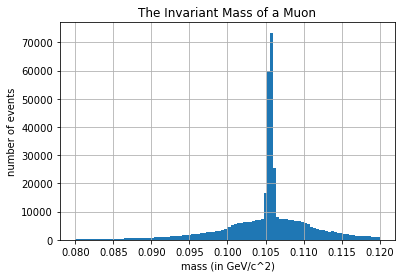

In [14]:
plt.hist(data['mass'], bins=100, range=[0.08,.12], log=False)  # makes the histogram
plt.title("The Invariant Mass of a Muon")
plt.xlabel("mass (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(True);

## Part Four
The code above may take a few moments to run since it's grabbing a pretty big data set (>400,000 events!?). When it's finished, you'll see a histogram of the invariant mass values you calucalted for muon 1 in each event. This is called a *mass plot*.  
- You'll probably need to adjust the histogram's range and number of bins to see a clear peak. The x-value of that peak occurs at the invariant mass of the particle (in this case, a muon).
- Based on your histogram, what value does the muon's invariant mass seem to be?
     - ***around .106 GeV/c^2***
- Try replacing the histogram's title and x-axis label to something better.  

## Part Five  
Now that you've analyzed your own huge set of particle collision events, here are some follow-up questions:
- How does the value you calculated compare to the accepted mass of the [muon](https://en.wikipedia.org/wiki/Muon)? Is it very different, if so why might that be?
    - ** The accepted value is 105.66 MeV/c^2 with is 0.10566 GeV/c^2. That's pretty close to where the peak in the histogram is.***
- Why doesn't energy have x, y, and z components like momentum?
    - ***Because energy is a scalar quantity, not a vector. It doesn't have a direction.***
- How does E<sup>2</sup> - p<sup>2</sup> give you a unit of mass<sup>2</sup>?
    - ***the invariant mass equation is really: <center>E<sup>2</sup>c<sup>2</sup> = m<sup>2</sup>c<sup>4</sup> + p<sup>2</sup>c<sup>2</sup></center> If we use units for energy (GeV) and momentum (GeV/c), then the units of mass come out to be GeV/c<sup>2</sup> ... the accepted units in the reference of the muon mass. That's because units of energy (GeV) divided by c<sup>2</sup> (velocity<sup>2</sup>) leave units of mass. You can see that classically in the formula for kinetic energy.***

## More Tools  
The cells below show some more advanced techniques.  

In [ ]:
# run this command to make your plots look like they're from xkcd.com
plt.xkcd();
# then re-execute your code to make a plot and see it xkcd-ified.

In [ ]:
# run this cell to make normal-looking plots again
mpl.rcdefaults()

A professional physicist would usually fit a theoretical curve to the mass plot to identify the particle's invariant mass. For reconstructing more complex particle decays they'd use a [relativistic Breit-Wigner](https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution) curve, but we'll try it here just for practice.  
- First, choose some parameters for the curve based on where the peak is on your histogram and how wide it looks.  
- Then, run the code and keep adjusting the parameters until the curve tightly fits the peak.

In [ ]:
# set the Breit-Wigner parameters
xmin = 0  # lower bound for your plot
xmax = 1  # upper bound for your plot
particle_mass = .5 # the x-value of the peak
width = .02 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 15  # a constant that affects the height of the curve, you'll need to tinker with this some

# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# make the plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(data['mass'], bins=10, range=[xmin,xmax], log=False)  # plots the histogram
ax.plot(x, y, color='r')  # plots the curve
plt.title("title me!")
plt.xlabel("x-axis label (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(True);

If you finally have a curve that pretty closely fits the peak in your histogram, take a look at the parameters you set. We can use those to determine the particle's mass and lifetime. The invariant mass of the particle is your *particle_mass*. The particle's mean lifetime is h-bar/width.  
- How do the values below compare with the accepted values for mass and lifetime of the muon?  
They probably don't agree very well because we're applying the Breit-Wigner curve to a particle we observed (not valid) instead of one we're trying to reconstruct from analyzing its decay products. If you ever find yourself doing a *mass reconstruction* to discover a short-lived particle by its decay products, this will might be useful.

In [ ]:
print("mass = ", np.round(particle_mass,6), " GeV/c^2")
hbar = 6.6e-25      # in GeV*s
print("mean lifetime = ", np.format_float_scientific(hbar/width,6), " seconds")

---  
## Saving Your Work  
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:  
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Collaboratory". You can run it later from there.  
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)  
- File > Print to ... um ... print.  
- To save an image of a graph or chart, right-click on it and select Save Image as ...  

## Credits
This notebook was designed by [Quarknet](https://quarknet.org/) Teaching and Learning Fellow [Adam LaMee](https://adamlamee.github.io/) and UCF Physics undergrad Brooke Emison. The handy csv files were created from the CMS Run2011A primary datasets and converted from ROOT format by the masterful [Tom McCauley](https://github.com/tpmccauley). More can be found on the [CERN OpenData](http://opendata.cern.ch/?ln=en) site, like [here](http://opendata.cern.ch/record/545). The 3D vector image can be found on [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:Coord_XYZ.svg). Finally, thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device. Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org).